In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("F:\PYTHAN\PYTHAN\iNeuron\EDA\PCA\Data_set\winequalityN - winequalityN.csv")

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.shape

(6497, 13)

In [8]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [9]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [12]:
df.isnull().sum().sort_values(ascending = False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

In [13]:
df.duplicated().sum()

1168

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.shape

(5329, 13)

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum().sort_values(ascending = False)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
df.shape

(5295, 13)

In [23]:
import seaborn as sns

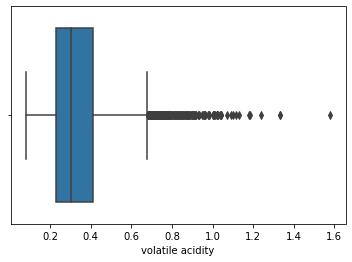

In [30]:
sns.boxplot(x = df['volatile acidity'])
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [28]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [31]:
x = df.iloc[:,1:]
y = df.iloc[:,0:1]

In [32]:
x.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [33]:
y.head(1)

,type
0,white


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 20, random_state = 42)

In [39]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3967,6.3,0.270,0.51,7.6,0.049,35.0,200.0,0.99548,3.16,0.54,9.400000,4
5313,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.300000,5
2446,6.6,0.320,0.33,2.5,0.052,40.0,210.0,0.99316,3.15,0.60,10.000000,5
4118,6.5,0.430,0.31,3.6,0.046,19.0,143.0,0.99022,3.15,0.34,12.000000,8
358,10.0,0.200,0.39,1.4,0.050,19.0,152.0,0.99400,3.00,0.42,10.400000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3830,4.8,0.260,0.23,10.6,0.034,23.0,111.0,0.99274,3.46,0.28,11.500000,7
4699,6.8,0.300,0.33,12.8,0.041,60.0,168.0,0.99659,3.10,0.56,9.800000,5
6373,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7
6414,6.1,0.320,0.25,2.3,0.071,23.0,58.0,0.99633,3.42,0.97,10.600000,5


In [40]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.99340,3.08,0.45,9.100000,5
1320,7.6,0.19,0.42,1.5,0.044,6.0,114.0,0.99140,3.04,0.74,12.800000,6
983,5.7,0.36,0.34,4.2,0.026,21.0,77.0,0.99070,3.41,0.45,11.900000,6
4380,5.7,0.31,0.29,7.3,0.050,33.0,143.0,0.99332,3.31,0.50,11.066667,6
6362,6.8,0.59,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.700000,5
5722,7.1,0.48,0.28,2.8,0.068,6.0,16.0,0.99682,3.24,0.53,10.300000,5
1838,6.5,0.34,0.36,11.0,0.052,53.0,247.0,0.99840,3.44,0.55,9.300000,6
5069,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.200000,6
2016,6.3,0.41,0.33,4.7,0.023,28.0,110.0,0.99100,3.30,0.38,12.500000,7
709,6.2,0.47,0.21,1.0,0.044,13.0,98.0,0.99345,3.14,0.46,9.200000,5


In [36]:
x_train.shape

(5275, 12)

In [37]:
x_test.shape

(20, 12)

In [41]:
#Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
knn_npca = KNeighborsClassifier()
knn_npca.fit(x_train_scaled,y_train)
y_pred_npca = knn_npca.predict(x_test_scaled)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
accuracy_score(y_test,y_pred_npca)

1.0

In [47]:
pca = PCA(n_components=2)
x_train_pca= pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [48]:
#Train a K-Nearest Neighbors (KNN) classifier with PCA
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca,y_train)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [49]:
y_pred_pca = knn_pca.predict(x_test_pca)
accuracy_pca = accuracy_score(y_test,y_pred_pca)
print(accuracy_pca)

1.0


In [50]:
pca = PCA(n_components=None)
x1_train = pca.fit_transform(x_train_scaled)
x1_test = pca.transform(x_test_scaled)

In [51]:
pca.explained_variance_

array([3.01861509, 2.63114151, 1.67534428, 1.06869386, 0.8476384 ,
       0.66379062, 0.54770802, 0.51097296, 0.47498953, 0.30279578,
       0.22568465, 0.03490062])

In [52]:
pca.explained_variance_.shape

(12,)

In [54]:
pca.components_

array([[ 2.99764455e-01,  4.02975218e-01, -1.18452180e-01,
        -2.47676980e-01,  3.49214365e-01, -4.01801417e-01,
        -4.43045795e-01,  2.09107034e-01,  1.64596146e-01,
         3.20185155e-01, -4.40435440e-02, -1.31972732e-01],
       [ 2.07506902e-01,  3.61449016e-02,  1.76871050e-01,
         3.90998634e-01,  2.06038039e-01,  2.01710123e-01,
         2.42192774e-01,  5.16737568e-01, -1.87312173e-01,
         6.30823187e-02, -4.88394205e-01, -2.91656138e-01],
       [ 4.58118968e-01, -2.83074744e-01,  5.86888039e-01,
        -7.45811968e-02,  5.57856086e-02, -9.12866246e-02,
        -9.79453519e-02, -5.20561399e-02, -4.15910298e-01,
         1.74515523e-01,  2.15077078e-01,  2.94197496e-01],
       [-1.45227366e-01, -6.78989785e-02,  5.58482610e-02,
         1.46251634e-01,  1.64113180e-01,  2.85200370e-01,
         1.24480572e-01,  1.65512437e-01,  4.79415948e-01,
         5.66232701e-01,  9.12648677e-02,  4.89734220e-01],
       [ 2.09199958e-01,  1.78978949e-01, -1.6765506

In [53]:
pca.components_.shape

(12, 12)

In [55]:
pca.explained_variance_ratio_

array([0.25150357, 0.21922023, 0.13958556, 0.08904094, 0.07062314,
       0.0553054 , 0.04563368, 0.04257301, 0.03957496, 0.0252282 ,
       0.01880349, 0.00290783])

In [56]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25150357, 0.4707238 , 0.61030935, 0.69935029, 0.76997343,
       0.82527883, 0.87091252, 0.91348552, 0.95306048, 0.97828868,
       0.99709217, 1.        ])

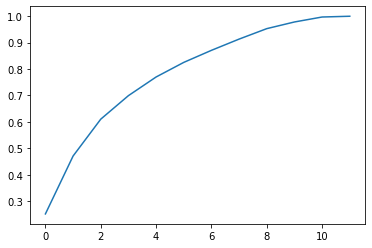

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))